# Natural computing: Exercises on Evolutionary Computation


## Group 3: Kaspar Daemen (s1031075), Bram Pol (s4815521), Remco Cloudt (s1028633)

### Imports

In [ ]:
from random import randint
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from random import random as rand
np.random.seed(10)
from random import sample 
from IPython.display import clear_output

## Exercise 1



$A1 = *0**01***$      ,$l(A1)=9, o(A1)=4$

$A2 = **010*111$      ,$l(A2)=9, o(A2)=6$

$p_m = 0.01$

General formula for the Probability of surviving a mutation: $S_m(H) = (1 - p_m)^{o(H)}$

$S_m(A1) = (1-0.01)^4 = 0.99^4 \approx 0.96 $

$S_m(A2) = (1-0.01)^6 = 0.99^6 \approx 0.94 $

So the probability of surviving the mutation is higher for schema A1 than schema A2 since $S_m(A1) \gt S_m(A2)$

# Exercise 2


The problem has to be a problem in which a combination of two semi-good solutions not necessarily guarantee a better result. 
Perhaps the traveling salesman problem (TSP). Since two routes can both consist of a large part of the optimal solution, but then a combination of the two does not necessarily entail a better solution, as the cut-off point of the two solutions is chosen randomly, and therefore has a large chance of cutting the well-chosen part of the solution in half. Recombination then results in a worse result than both of the separate solutions. 

# Exercise 3

$f$($x$) = $x^2$

| $x$ value | $f$($x$) | $f_i$ $\Sigma$ $f$ | Expected Number |
|---|------|--------------------------|-----------------|
| 2 | 4    | 0.138                    | 0.414           |
| 3 | 9    | 0.310                    | 0.93            |
| 4 | 16   | 0.552                    | 1.656           |

$f_1$($x$) = $f$($x$) + 20

| $x$ value | $f$($x$) | $f_i$ $\Sigma$ $f$ | Expected Number |
|---|------|--------------------------|-----------------|
| 2 | 24    | 0.270                    | 0.81           |
| 3 | 99    | 0.336                    | 1.008            |
| 4 | 36   | 0.405                   | 1.215         |

### Scaling
High selection pressure means a large emphasis on the fitness of the organism to survive. If there is a large difference between individuals in terms of fitness, then it is very unlikely for the individuals with lower fitness to pass on to the next generation. Therefore the fitness function which introduces a large difference between individuals in terms of fitness values forces a high selection pressure. In this case we see that the scaling of the function results in the same individuals closing in on each other in terms of expected number, compared to the original function. Therefore the scaled function yields a lower selection pressure than the original function. Scaling the fitness function results in the same changes happening to each individual regardless of their individual fitness, making the fitness value less important. Therefore scaling the fitness function takes away from the selection pressure.

## Exercise 4

### The code

In [5]:
def invert(bit, p):
    if (random() < p):
        return 1-bit
    return bit

def GA(l=100, n_iterations=1500):
    p = 1/l
    
    #a: randomly generate a bit sequence x
    X = [randint(0,1) for x in range(0,l)]
    hist = [X]
    
    for i in range(n_iterations):  
        #b: create a copy of x and invert each of its bits with probability p. Let Xm be te result
        X_m = [invert(x,p) for x in X]

        #c: if x_m is closer to the goal sequence than x then repalce x with x_m
        if (sum(X_m) > sum(X)):
            X = X_m
        hist.append(X)
    
    return X, hist


def plot_fitness(hist):
    iterations = len(hist) -1
    x = [x for x in range(1,iterations+1)]
    y = [sum(x) for x in hist[1:]]
    plt.plot(x,y)
    plt.xlabel('number of iterations')
    plt.ylabel('best fitness')
    plt.title('Plot of the best fitness against the elapsed number of iterations')
    plt.show()


### 4a

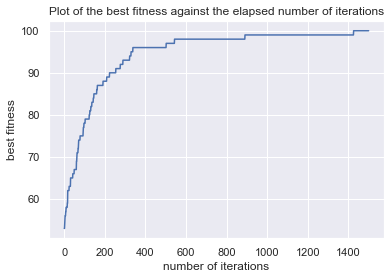

In [4]:
X, hist = GA(l=100, n_iterations = 1500)
plot_fitness(hist)

### 4b

In [106]:
runs = [sum(GA()[0]) for x in range(10)]
optimum_found = runs.count(100)
print(f'After 10 runs, the algorithm have found the optimum {optimum_found} times')

After 10 runs, the algorithm have found the optimum 9 times


### 4c

Let's alter step c in the algorithm:

In [109]:
def GA(l=100, n_iterations=1500):
    p = 1/l
    
    #a: randomly generate a bit sequence x
    X = [randint(0,1) for x in range(0,l)]
    hist = [X]
    
    for i in range(n_iterations):  
        #b: create a copy of x and invert each of its bits with probability p. Let Xm be te result
        X_m = [invert(x,p) for x in X]

        #c: if x_m is closer to the goal sequence than x then repalce x with x_m
        X = X_m
        hist.append(X)
    
    return X, hist

And look at the difference in the plot:

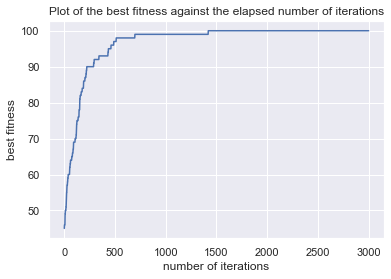

In [9]:
X, hist = GA(l=100, n_iterations = 3000)
plot_fitness(hist)

The difference is that $x_m$, with the altered c' step', will always replace $x$ in every iteration, regardless of the impact on the 'fitness'. Therefore, the algorithm has become unstable, the changes to the bit sequences are now purely based on a random probability and therefore the algorithm will never converge. 

# Exercise 5

In a (1+5)-strategy every iteration generates five mutated versions of the current individual, and subsequently evaluates their and the current individual's respective fitness values. The candidate with the best fitness is then chosen to continue to the next iteration. In a (1+1)-strategy only one mutated version is generated and then its fitness value is compared to that of the current individual to determine which of the two will pass on to the next iteration. Logically in terms of search space both strategies consider candidates that are quite locally present in the search space of the current candidate, as only one mutation step is performed to alter the candidate. However since in the (1+5)-strategy 5 different candidates are generated out of 5 random mutations, the search space is explored much faster, and more fit individuals therefore have a higher chance to be discovered more quickly compared to when only one mutation occurs. Replacing 5 with $\lambda$ results in the (1+5)-strategy to be turned into the (1+$\lambda$)-strategy. The (1+$\lambda$)-strategy can be said to mimic the approach of greedy algorithms in looking for an optimal result. As mentioned above the candidates that are considered can be considered local, as they are reached through only one manipulation, making them neighbors. Greedy algorithms also only consider those options that are reachable from the current iteration of the program, not looking further into the future. From these options it then chooses the one with the best value to become the new position. This is done by (1+$\lambda$)-strategy as well, if you substitute a large enough number for lambda such that there is a very small chance of missing the actual most optimal mutated version of the current individual. If it is chosen such that it almost guaranteed to always find the locally most optimal mutation, then this strategy is essentially the same as the greedy algorithm strategy.

The difference is that $x_m$, with the altered c' step', will always replace $x$ in every iteration, regardless of the impact on the 'fitness'. Therefore, the algorithm has become unstable, the changes to the bit sequences are now purely based on a random probability and therefore the algorithm will never converge. 

# Exercise 6

### The code:

In [12]:
class GA():
    def __init__(self, data, pop_size=100, n_iterations = 50, mutation_prob = 0.1, crossover_prob = 0.2, memetic = False):

        
        self.pop_size = pop_size
        self.hist = []
        self.data = data
        self.ind_size = len(data)
        self.crossover_prob = crossover_prob
        self.n_iterations = n_iterations
        self.mutation_prob = mutation_prob
        self.memetic = memetic
        
        
    def generate_pop(self):
        self.pop =  np.array([random.permutation([i for i in range(0,self.ind_size)]) for x in range(self.pop_size) ])
        
    def tournament(self):
        new_pop = []
        for i in range(self.pop_size):
            
            indices = random.choice(len(self.pop), 2, replace=True)
            candidates = self.pop[indices]
            
            fittest =  candidates[0] if self.evaluate(candidates[0]) < self.evaluate(candidates[1]) else candidates[1]
            new_pop.append(fittest)
        return new_pop
    
    def evaluate(self,ind):
        l = []
        for i in range(self.ind_size-1):
            dist = np.linalg.norm(self.data[ind[i]]-self.data[ind[i+1]])    
            l.append(dist)
        return l, sum(l)
    
    def avg_pop(self, pop):
        return np.average([self.evaluate(x)[1] for x in pop])
    
    def get_best_sol(self, pop):
        best_index = 0
        best_fitness = self.evaluate(pop[0])[1]
        for i in range(1, len(pop)):
            current = self.evaluate(pop[0])[1]
            if (current > best_fitness):
                best_index = i
                best_fitness = current
        return (best_index, best_fitness)
    
    
    def order_crossover(self,p1, p2, p):
        if not (rand() < p):
            return p1, p2
        size = self.ind_size
        p1, p2 = list(p1), list(p2)
        #(1) CHOOSE 2 CUT POINTS
        start, end = np.sort(random.choice(range(1,size - 1), 2, replace = False))
        c1 = [-1] * size
        c2 = [-1] * size
        
        # (2) COPY BETWEEEN CUT POINTS TO OFFSPRINGS
        c1[start:end] = p1[start:end]
        c2[start:end] = p2[start:end]
        
        
        p1_order = p1[end:] + p1[:end]
        p2_order = p2[end:] + p2[:end]

        missing_indices = np.append(range(end,size),range(0,start))

        # (3) STARTING FROM 2ND CUT POINT IN ONE PARENT, FILL MISSING CITIES IN ORDER THEY APPEAR IN OTHER PARENT
        p1_pos, p2_pos = 0, 0
        for index in missing_indices:
            #child 1
            while True:
                if(p2_order[p2_pos] not in c1):
                    c1[index] = p2_order[p2_pos]
                    p2_pos += 1
                    break
                p2_pos += 1
            #child 2
            while True:
                if(p1_order[p1_pos] not in c2):
                    c2[index] = p1_order[p1_pos]
                    p1_pos += 1
                    break
                p1_pos += 1   
             
        return c1, c2
    
    def reverse_sequence_mutation(self, parent, p):
        result = parent.copy()
        if not (rand() < p):
            return parent
        size = self.ind_size
        i1, i2 = np.sort(random.choice(range(0,size ), 2, replace = False))
        old_parent = parent.copy()
        result[i1] = old_parent[i2]
        result[i2] = old_parent[i1]
        
        return result
    
    # 2-opt local search algorithm
    def opt2 (self, parent):
        existing_route = list(parent.copy())
        best_distance = self.evaluate(existing_route)[1]
        for i in range(len(parent)-3):
            for j in range(i+2, len(parent)-1):
                edge1 = [i, i+1]
                edge2 = [j, j+1]
                #reverse the part between the two edges
                rev = list(reversed(existing_route[edge1[1]:edge2[1]]))
                new_route = existing_route[:edge1[1]] + rev + existing_route[edge2[1]:] 
                new_distance = self.evaluate(new_route)[1]
                if(new_distance < best_distance): 
                    existing_route = new_route
                    best_distance = new_distance
        return existing_route
        
    
    def local_search (self, parents):
        new_parents = []
        for parent in parents:
            new_parents.append(self.opt2(parent))
        return new_parents
    
    def plotfunc(self, seq, locs, iteration, distance):
        sortlocs = [locs[_ind] for _ind in seq]
        xs = [loc[0] for loc in sortlocs]
        ys = [loc[1] for loc in sortlocs]
        
        algorithm_title = "Simple EA: " if not self.memetic else "Memetic algorithm: "

        plt.figure(0)
        plt.scatter(xs, ys)
        plt.plot(xs, ys)
        plt.title(f'{algorithm_title}Best solution with a total distance of {distance}')
        plt.show()
        
    def plot_results(self):
        clear_output(wait=True)
        best_fitness, best_solutions = [x[0] for x in self.hist], [x[1] for x in self.hist]
        best_solution = best_solutions[np.argmin(best_fitness)]
        print(f'best fitness: {np.min(best_fitness)}, found in epoch: {np.argmin(best_fitness)}')
        
        algorithm_title = "Simple EA: " if not self.memetic else "Memetic algorithm: "
        
        plt.plot(range(len(best_fitness)), [x for x in best_fitness])
        plt.title(f'{algorithm_title}plot of the evolution process')
        plt.xlabel('generation')
        plt.ylabel('Best fitness')
        plt.show()
        
        self.plotfunc(best_solution, self.data, np.argmin(best_fitness), np.min(best_fitness))
        
        
    def run(self):   
        
        self.generate_pop()
        
        #save the first generation
        best_index, best_fitness = self.get_best_sol(self.pop)
        self.hist.append((best_fitness, self.pop[best_index]))
        
         #LOCAL SEARCH
        if(self.memetic):
            self.pop = np.array(self.local_search(self.pop))


        for i in range(self.n_iterations):
            print(f'Processing generation {i+1}')
            #select parents for reproduction
            new_pop = self.tournament()
            
            for j in range(0, len(new_pop), 2):
                p1 = self.pop[j]
                p2 = self.pop[j+1]
                
                #recombine selected parents
                c1, c2 = self.order_crossover(p1,p2, self.crossover_prob)
                
                #mutate the resulting individuals
                c1 = self.reverse_sequence_mutation(c1, self.mutation_prob)
                c2 = self.reverse_sequence_mutation(c2, self.mutation_prob)

                new_pop[j] = c1
                new_pop[j+1] = c2
            
            #LOCAL SEARCH
            if(self.memetic):
                new_pop = self.local_search(new_pop)
            
            #save generation
            best_index, best_fitness = self.get_best_sol(self.pop)
            self.hist.append((best_fitness, self.pop[best_index]))
            
            self.pop = np.array(new_pop)
                

In [13]:
data = np.loadtxt('file-tsp.txt') 

##  6a

best fitness: 431.2603091683258, found in epoch: 18


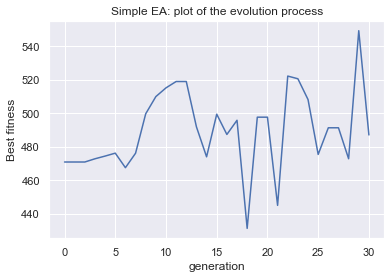

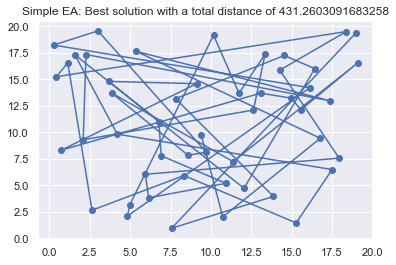

In [5]:
simple_EA = GA(data, n_iterations = 30, mutation_prob=0.1, pop_size=100, crossover_prob=0.8, memetic = False)
simple_EA.run()
simple_EA.plot_results()

best fitness: 123.24234080850964, found in epoch: 8


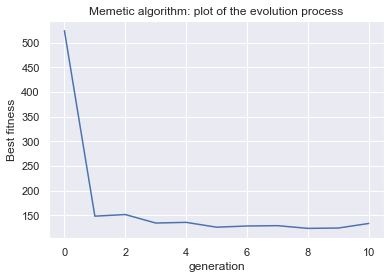

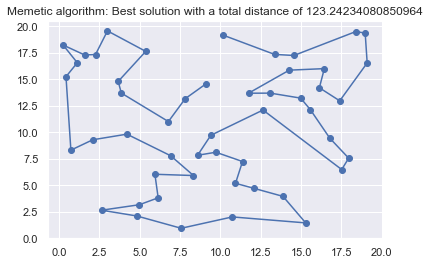

In [21]:
memetic_algorithm = GA(data,n_iterations = 10, mutation_prob=0.8, pop_size=100, crossover_prob=0.8, memetic = True)
memetic_algorithm.run()
memetic_algorithm.plot_results()

In [22]:
data = np.loadtxt('berlin52.tsp.txt')
#delete the useless first column
data = np.delete(data, 0, 1)

best fitness: 25832.81148587333, found in epoch: 5


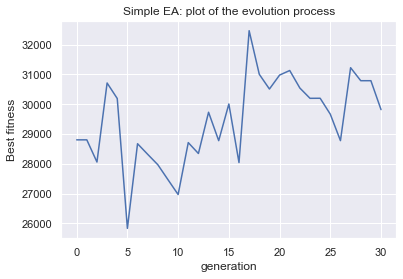

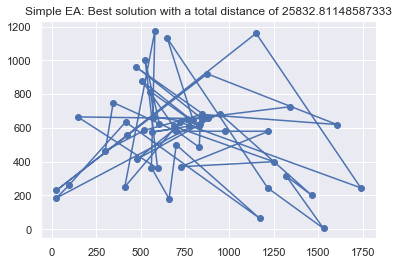

In [23]:
simple_EA = GA(data, n_iterations = 30, mutation_prob=0.8, pop_size=100, crossover_prob=0.8, memetic = False)
simple_EA.run()
simple_EA.plot_results()

best fitness: 8194.457155463402, found in epoch: 10


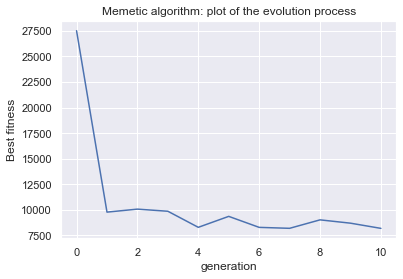

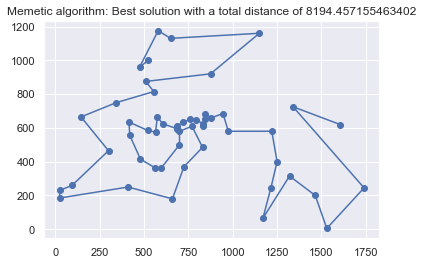

In [24]:
memetic_algorithm = GA(data, n_iterations = 10, mutation_prob=0.8, pop_size=100, crossover_prob=0.8, memetic = True)
memetic_algorithm.run()
memetic_algorithm.plot_results()

## 6b

**On the TSP problem are memetic algorithms more effective than the simple
EA’ s? (To answer this question, use the results of your investigation as well as
recent results from the literature).**

As can be seen in the figures above, the simple EA has a difficult time to reach a result that is in any way comparable to the performance of the memetic algorithm. Oscillating performance can be seen, with local optima appearing every few generations. These local optima are not comparable to the global optimum found by the mematic algorithm however. As discussed in [1], the TSP is a type of problem in which (simpler) evolutionary algorithms "cannot compete with heuristic approaches". Algorithms based on merely a cross-over and mutation steps "do not escape efficiently local optima", which is exactly what we see as well. The moment we incorporate a more intelligent way of candidate generation through local search we see a great increase in performance.


# Excercise 7
Give a suitable function, terminal set and s-expression for the following logical and mathematical formulas.

## 7.A. $(Y \land True) \rightarrow ((X \lor Y) \lor (Z \leftrightarrow (X \land Y))) $
### 7.A.1. Function 
$\{\lor, \rightarrow, \land, \leftrightarrow \} $
### 7.A.2. Terminal set
$ \{ Y, True, X, Z \}$
### 7.A.3. S-Expression
$ (\rightarrow\ (\land\ Y\ True)\ ( \lor\ (\lor\ (\ X\ Y\ ) \ (\leftrightarrow\ Z\ (\land\ X\ Y\ ))))$

## 7.B. $ 0.234 * Z + X - 0.789 $
### 7.B.1. Function 
$ \{ *, +, - \}$
### 7.B.2. Terminal set
$ \{ Z, X, 0.234, 0,789\} $
### 7.B.3. S-Expression
$( +\ (*\ 0.234\ Z\ )\ (-\ X\ 0.789)) $


# Excercise 8
Implement a GP program for finding a symbolic expression that fits the following data:                           

|(Input) DependentVariable  | Y(Output) |
| ------------------------- | ----------|
| −1.0                      | 0.0000    |
| −0.9                      | −0.1629   |
| −0.8                      | −0.2624   | 
| −0.7                      | −0.3129   |
| −0.6                      | −0.3264   |
| −0.5                      | −0.3125   |
| −0.4                      | −0.2784   |
| −0.3                      | −0.2289   |
| −0.2                      | −0.1664   |
| −0.1                      | −0.0909   |
|  0                        |    0.0    |
|  0.1                      |  0.1111   |
|  0.2                      |   0.2496  |
|  0.3                      |   0.4251  |
|  0.4                      |   0.6496  |
|  0.5                      |   0.9375  |
|  0.6                      |   1.3056  |
|  0.7                      |   1.7731  |
|  0.8                      |   2.3616  |
|  0.9                      |   3.0951  |
|  1.0                      |   4.0000  |

With the following parameter settings:   
- population size: 1000, 
- function set: {+, −, ∗, log, exp, sin, cos, div}, 
- terminal set: x, 
- number of generations 50, 
- crossover probability 0.7, 
- mutation probability: 0, 
- fitness: - sum of absolute errors

You can use an existing GP framework:   
see for instance list of implementation frameworks mentioned in the syllabus. 
Plot the following:
- (a) best of generation fitness (y-axis) versus generation (x-axis). 
- (b) best of generation size (y-axis) versus generation (x-axis). 

Can you observe any undesirable phenomenon from these plots? In case of positive answer, how would you try to overcome the related problem (you can refer to the literature).



In [1]:
#This solution has been based on code from: https://deap.readthedocs.io/en/master/examples/gp_symbreg.html

import deap.gp as gp
from deap import creator 
from deap import base
from deap import creator
from deap import tools
import numpy as np
import operator
import math
import random
import deap.algorithms as algorithms

data =[[-1.0, 0.0000],[-0.9, -0.1629],[-0.8, -0.2624],[-0.7, -0.3129],[-0.6, -0.3264],[-0.5, -0.3125],[-0.4, -0.2784],
        [-0.3, -0.2289], [-0.2, -0.1664],[-0.1, -0.0909],[0, 0.0],[0.1, 0.1111],[0.2, 0.2496],[0.3, 0.4251],[0.4, 0.6496],
        [0.5, 0.9375], [0.6, 1.3056],[0.7, 1.7731],[0.8, 2.3616],[0.9, 3.0951],[1.0, 4.0000]]

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    
def protectedLog(base):
    try: 
        return math.log(base)
    except ValueError:
        return 1
    

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.exp, 1)
pset.addPrimitive(protectedLog, 1)
pset.addEphemeralConstant("A", lambda: random.randint(-1,1))


pset.renameArguments(ARG0='x')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # our custom absolute error function
    abserrors = (np.abs(func(x[0]) - x[1]) for x in points)
    #print(points)
    return math.fsum(abserrors) / len(points),

toolbox.register("evaluate", evalSymbReg, points=data)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)
    
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1) 
pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0, 50, stats=mstats,
                                       halloffame=hof, verbose=True)


   	      	                        fitness                         	                      size                     
   	      	--------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min     	nevals	std     	avg 	gen	max	min	nevals	std    
0  	100   	1.09632	0  	3.26088	0.442563	100   	0.493144	3.33	0  	7  	2  	100   	1.25742
1  	62    	0.905687	1  	3.64902	0.442563	62    	0.415036	3.25	1  	7  	2  	62    	1.08972
2  	76    	0.819868	2  	2.60793	0.259679	76    	0.343079	3.22	2  	6  	2  	76    	0.954777
3  	68    	0.709892	3  	2.2683 	0.259679	68    	0.246304	3.27	3  	6  	2  	68    	1.18199 
4  	68    	0.67634 	4  	1.60793	0.259679	68    	0.242736	3.63	4  	7  	2  	68    	1.30119 
5  	62    	0.690111	5  	2.86353	0.259679	62    	0.404785	4.12	5  	7  	2  	62    	1.49853 
6  	68    	0.682547	6  	3.05595	0.202237	68    	0.476269	4.83	6  	7  	2  	68    	1.23333 
7  	68    	0.75228 	7  	3.40297	0.202237	68    	0.663

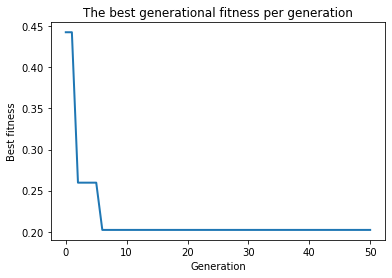

In [2]:
import matplotlib.pyplot as plt

plt.title("The best generational fitness per generation")
plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.plot(log.select("gen"), log.chapters["fitness"].select("min"), linewidth=2.0)

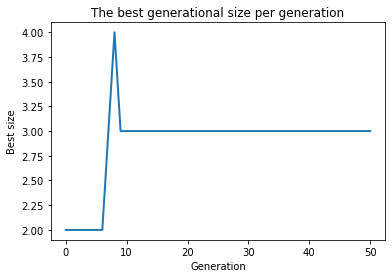

In [3]:
plt.title("The best generational size per generation")
plt.xlabel("Generation")
plt.ylabel("Best size")
plt.plot(log.select("gen"), log.chapters["size"].select("min"), linewidth=2.0)

#### Can you observe any undesirable phenomenon from these plots? 
The model converges quickly, and does not converge any further after that point.
#### In case of positive answer, how would you try to overcome the related problem (you can refer to the literature)
By making use of mutations, where a subtree is replaced by a new randomly generated tree, we can get the network out of a local minimum for better convergence. 

## References

[1] Tao, G., & Michalewicz, Z. (1998). Evolutionary algorithms for the TSP. Parallel Problem Solving from Nature, 1498, 803-812.